https://www.kaggle.com/kaggle/sf-salaries

In [1]:
import numpy as np
import pandas as pd

In [2]:
salaries = pd.read_csv('salaries.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


C:\Users\denilv\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [4]:
import sys
import unicodedata
TRANSLATE_PUNCTUATION = dict.fromkeys(i for i in xrange(sys.maxunicode) if \
                                      not unicodedata.category(unichr(i)).startswith('L'))

def parse_text_field(input_str, encoding='utf-8'):
    if isinstance(input_str, bytes):
        input_str = input_str.decode(encoding)
    string_parsed = input_str.translate(TRANSLATE_PUNCTUATION)
    return string_parsed.lower()

def filter_job_position(input_str, positions):
    input_str = parse_text_field(input_str)
    for pos in positions:
        if pos in input_str:
            return pos
    return False
        
m_positions = [u'manager', u'ceo', u'director', u'chief', u'captain', u'assistant', u'operator', u'nurse', \
              u'custodian', u'officer', u'clerk', u'garderner', u'firefighter', u'analyst', u'sheriff', u'engineer',\
              u'librarian', u'mechanic', u'painter', u'laborer', u'counselor', u'accountant ']

In [5]:
salaries['mp'] = map(lambda x: filter_job_position(x, m_positions), salaries['JobTitle'])

In [6]:
df = salaries[salaries['mp'] != False]
df = df.convert_objects(convert_numeric=True)
#df = df[df['BasePay'] > 10]
df = df.fillna(0)

salaries = salaries.convert_objects(convert_numeric=True)
salaries = salaries.fillna(0)

C:\Users\denilv\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\denilv\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [7]:
df.columns

Index([u'Id', u'EmployeeName', u'JobTitle', u'BasePay', u'OvertimePay',
       u'OtherPay', u'Benefits', u'TotalPay', u'TotalPayBenefits', u'Year',
       u'Notes', u'Agency', u'Status', u'mp'],
      dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
sns.set_style('whitegrid')
sns.set_palette("Set3")

Populating the interactive namespace from numpy and matplotlib


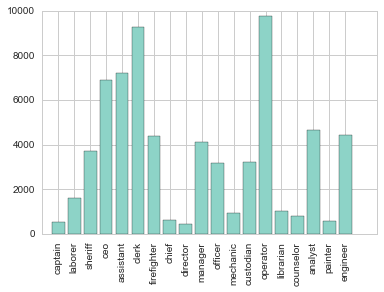

In [9]:
d = dict(df.mp.value_counts()[1:30])
plt.bar(range(len(d)), d.values(), align = 'center')
plt.xlim(-1)
plt.xticks(range(len(d)), d.keys(), rotation = 'vertical')
plt.show()

In [11]:
cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits', 'TotalPay']

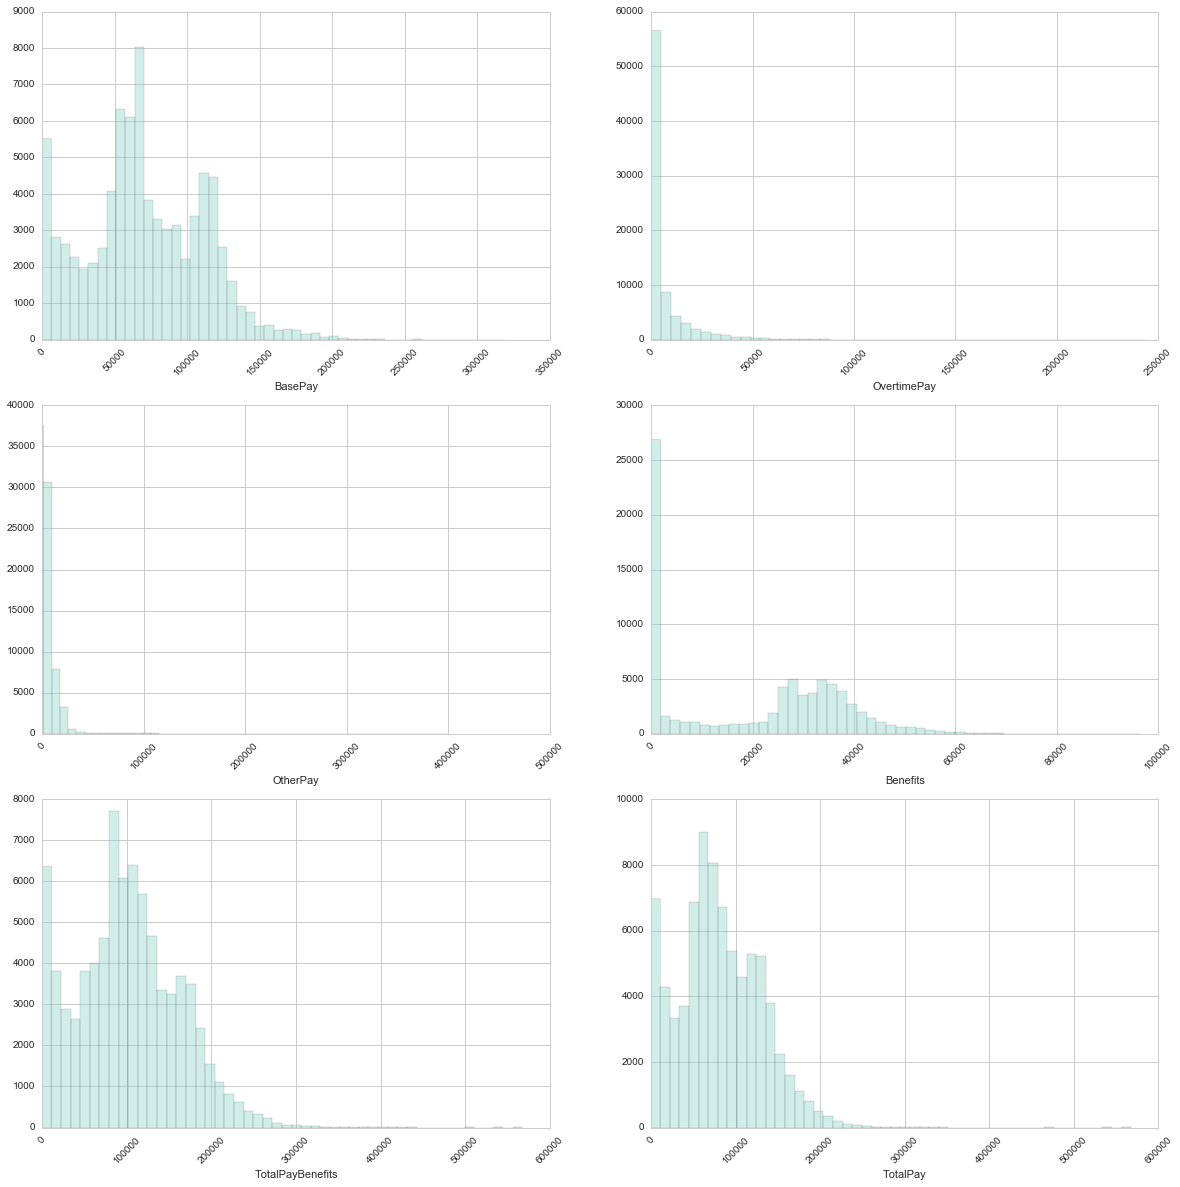

In [12]:
for i, j in enumerate(cols):
    plt.subplot(3, 2,i+1)
    fig = plt.gcf()
    fig.set_size_inches(20,20)
    sns.distplot(df[j], kde=False)
    plt.xlim(0)
    plt.xticks(rotation=45)
plt.show()

In [13]:
def find_correlated_features(x, features):
    # replace this code to find really correlated features
    corr_matrix = abs(np.corrcoef(x.T))
    for i, feature_i in enumerate(features):
        for j, feature_j in enumerate(features):
            if i < j and  corr_matrix[i,j] > 0.2:
                print "Correlated features: %s + %s -> %.2f" % (feature_i, feature_j, corr_matrix[i,j])
    

In [14]:
x = df[cols].values
find_correlated_features(x, cols)

Correlated features: BasePay + OvertimePay -> 0.26
Correlated features: BasePay + OtherPay -> 0.28
Correlated features: BasePay + Benefits -> 0.59
Correlated features: BasePay + TotalPayBenefits -> 0.93
Correlated features: BasePay + TotalPay -> 0.94
Correlated features: OvertimePay + OtherPay -> 0.32
Correlated features: OvertimePay + Benefits -> 0.22
Correlated features: OvertimePay + TotalPayBenefits -> 0.48
Correlated features: OvertimePay + TotalPay -> 0.52
Correlated features: OtherPay + TotalPayBenefits -> 0.43
Correlated features: OtherPay + TotalPay -> 0.48
Correlated features: Benefits + TotalPayBenefits -> 0.74
Correlated features: Benefits + TotalPay -> 0.57
Correlated features: TotalPayBenefits + TotalPay -> 0.97


In [15]:
gr = df.groupby(by='mp')

In [16]:
df_by_jobtitle = gr.mean()[cols]
df_by_jobtitle = df_by_jobtitle.sort('BasePay', ascending=True)

C:\Users\denilv\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [17]:
df.mp.value_counts()

nurse          12953
operator        9764
clerk           9284
assistant       7230
ceo             6912
analyst         4655
engineer        4433
firefighter     4372
manager         4110
sheriff         3701
custodian       3214
officer         3165
laborer         1593
librarian       1020
mechanic         938
counselor        830
chief            627
painter          596
captain          552
director         442
Name: mp, dtype: int64

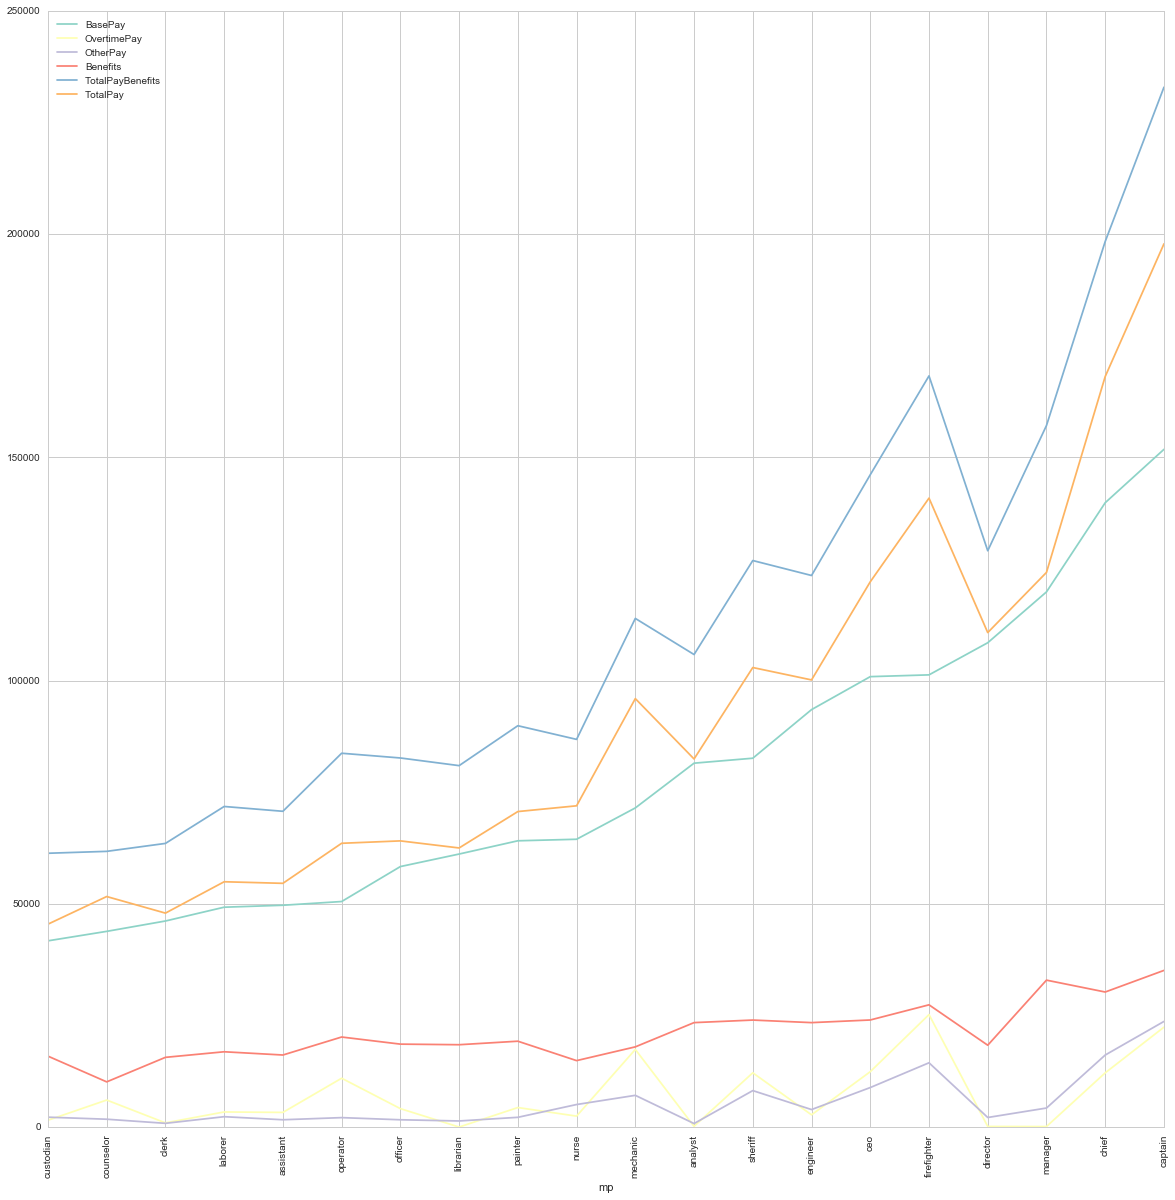

In [18]:
df_by_jobtitle.plot(figsize=(20,20), rot=90)
#plt.bar(range(len(d)), d.values(), align = 'center')
#plt.xlim(-1)
#(df_by_jobtitle.index.values, rotation = 'vertical')
#ax.set_xticklabels(df_by_jobtitle.index.values)
plt.xticks(np.arange(len(df_by_jobtitle)), df_by_jobtitle.index.values)
plt.show()


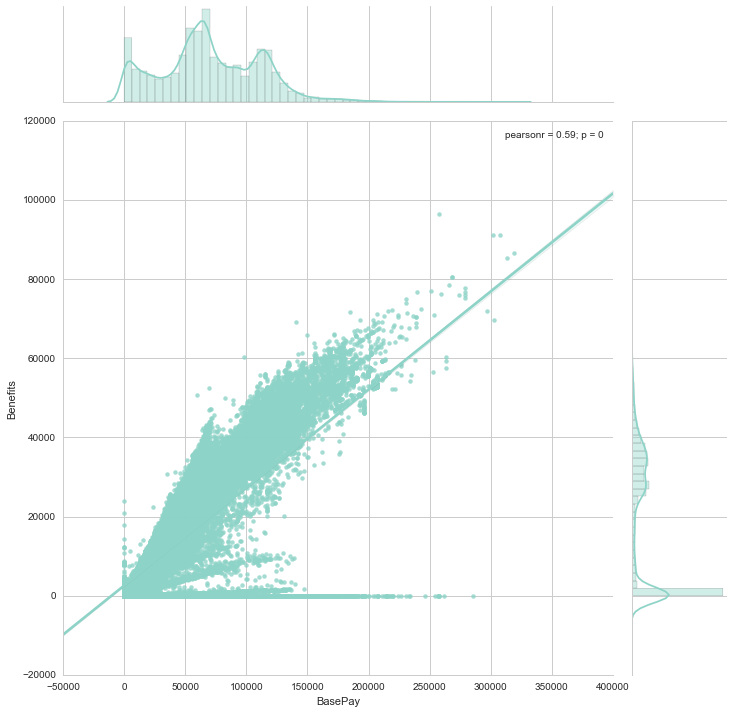

In [20]:
x = df.BasePay
y = df.Benefits
sns.jointplot(x=x, y=y, kind='reg', size=10)

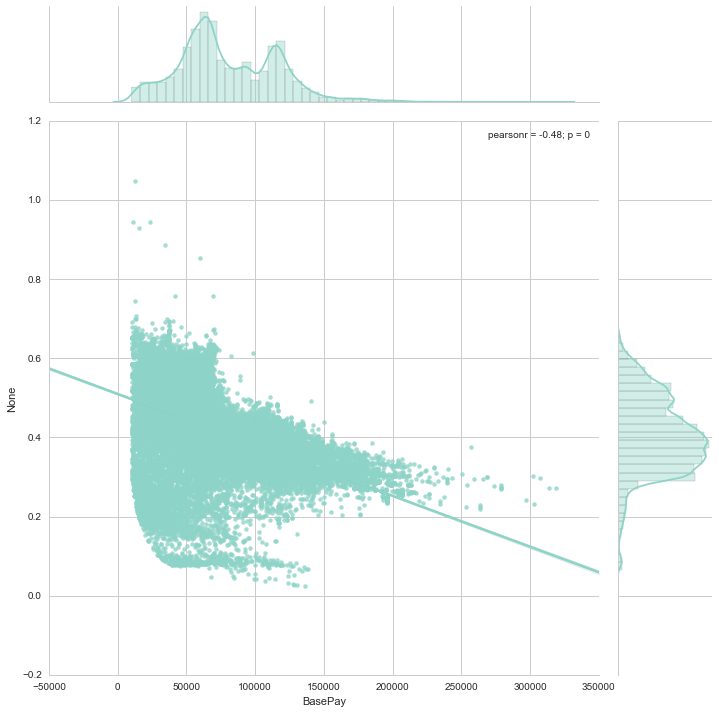

In [25]:
new_df = df[(df['BasePay']>10000) & (df['Benefits']>3000)]
x = new_df.BasePay
y = new_df.Benefits/x
sns.jointplot(x=x, y=y, kind='reg', size=10)

(array([ 0. ,  0.5,  1. ,  1.5,  2. ]), <a list of 5 Text xticklabel objects>)

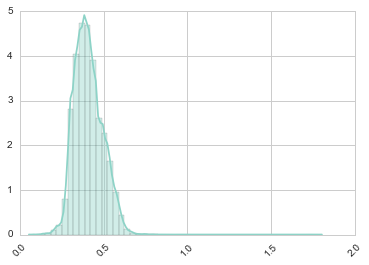

In [22]:
new_salaries = salaries[(salaries['BasePay']>10000) & (salaries['Benefits']>10000)]
sns.distplot(new_salaries.Benefits/new_salaries.BasePay, kde=True)
plt.xlim(0)
plt.xticks(rotation=45)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 8 Text xticklabel objects>)

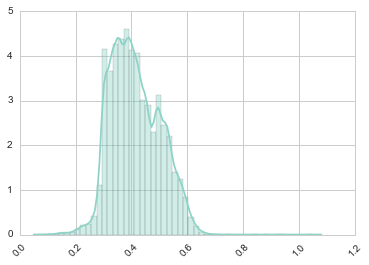

In [23]:
new_df = df[(df['BasePay']>10000) & (df['Benefits']>10000)]
sns.distplot(new_df.Benefits/new_df.BasePay, kde=True)
plt.xlim(0)
plt.xticks(rotation=45)

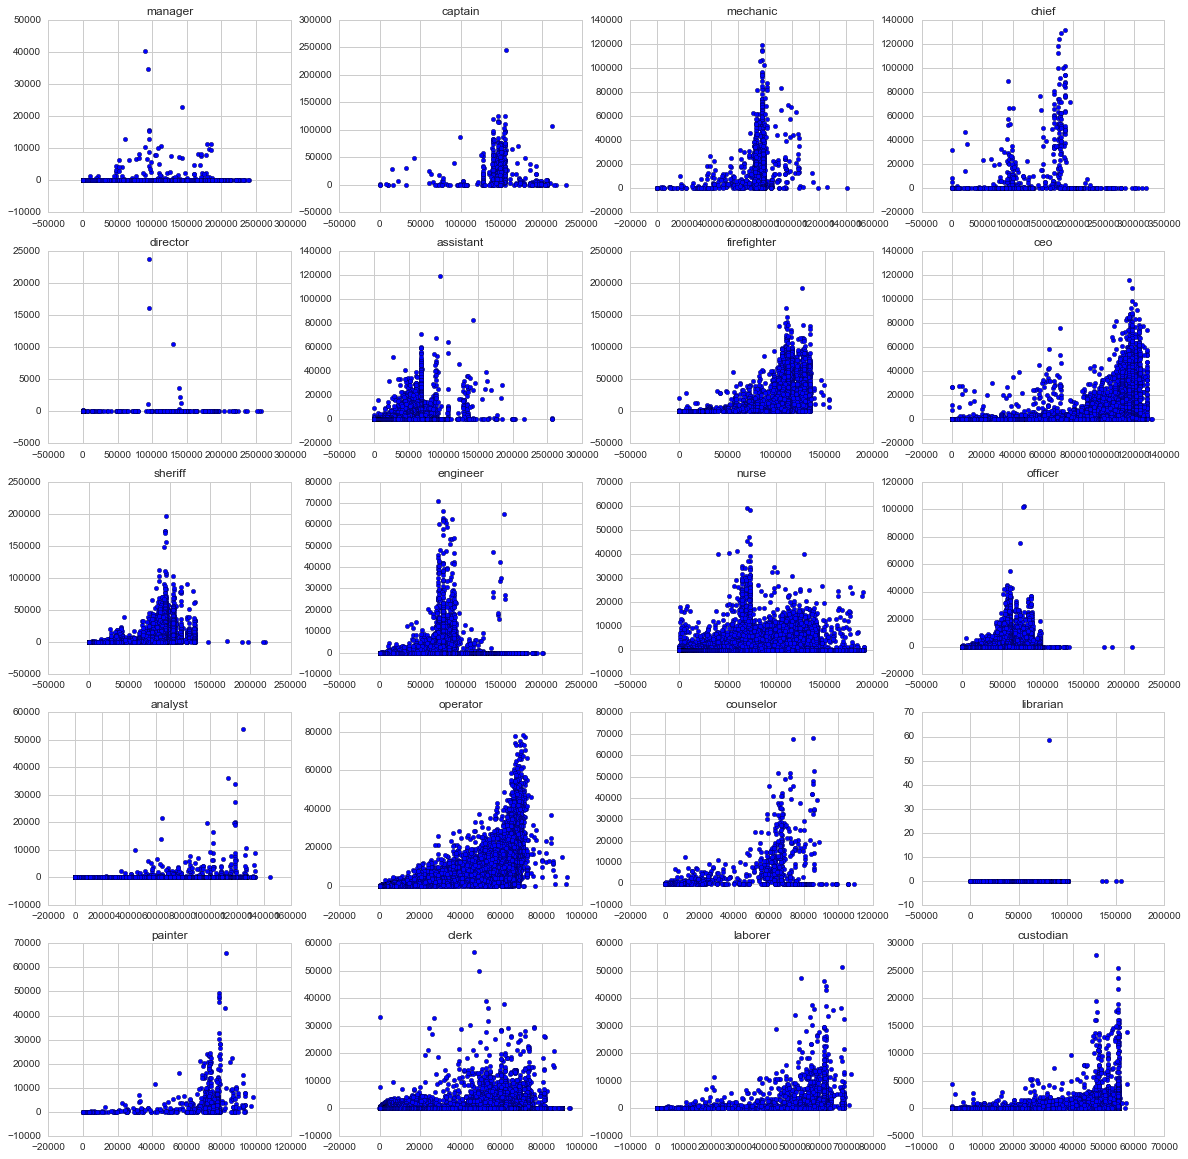

In [49]:
for i, j in enumerate(df.mp.unique()):
    plt.subplot(5, 4,i+1)
    fig = plt.gcf()
    fig.set_size_inches(20,20)
    tmp = df[df['mp'] == j]
    
    x = tmp.BasePay
    y = tmp.OvertimePay
    #sns.jointplot(x=x, y=y, kind='scatter', size=10)
    plt.scatter(x, y)
    plt.title(j)
plt.show()
#x = df.TotalPay
#y = df.Benefits
#plt.scatter(x, y, c=df.mp)

In [ ]:
sns.joint 